# Least squares

## Linear Least squares

In [1]:
# Import modules
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [2]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.bbox'] = 'tight'

### Least-Squares fit of a straight line
* Using the model:


$y = a_0 + a_1 x$


* The slope and intercept producing the best fit can be found using:


$a_1 = \frac{\bar{xy}-\bar{x}\bar{y}}{\bar{x^2}-(\bar{x})^2}$


$a_0 = \bar{y} - a_1\bar{x}$


### Quantification of Error
* Recal for a straight line, the sum of the squares of the estimate residuals:


$S_r = \sum_{i=1}^{n}e_i^2 = \sum_{i=1}^{n}(y_i - a_0 - a_1 x_i)^2$

### Coefficient of Determination
* The coefficient of determination r2 is the difference between the sum of the squares of the data residuals and the sum of the squares of the estimate residuals, normalized by the sum of the squares of the data residuals:


$r^2 = \frac{S_t - S_r}{S_t}$


* $r^2$ represents the percentage of the original uncertainty explained by the model.
* For a perfect fit, $S_r = 0$ and $r^2 = 1$.
* If $r^2 = 0$, there is no improvement over simply picking the mean.

In [3]:
def find_slope(x, y):
    xy = x * y
    x2 = x ** 2
    return (xy.mean() - (x.mean() * y.mean())) / (x2.mean() - (x.mean() ** 2))

def find_intercept(x, y):
    slope = find_slope(x, y)
    return y.mean() - (slope * x.mean())

def find_sr(x, y):
    slope = find_slope(x, y)
    intercept = find_intercept(x, y)
    sum_error = 0
    for i in range(x.size):
        sum_error += math.pow(y[i] - ((slope * x[i]) + intercept), 2)
    return sum_error

def find_st(y):
    sum_st = 0
    for i in range(y.size):
        sum_st += math.pow((y[i] - y.mean()), 2)
    return sum_st

def find_r2(x, y):
    st = find_st(y)
    sr = find_sr(x, y)
    return (st - sr) / st

def linregress(x, y):
    slope = find_slope(x, y)
    intercept = find_slope(x, y)
    sr = find_sr(x, y)
    r2 = find_r2(x, y)
    return slope, intercept, sr, r2

In [4]:
def linear_regression(x, y):
    reg = []
    slope = find_slope(x, y)
    intercept = find_intercept(x, y)
    for i in range(x.size):
        reg.append(slope * x[i] + intercept)
    return reg

### Example Data

In [5]:
x, y = np.loadtxt("data/test_stat1_6.csv")

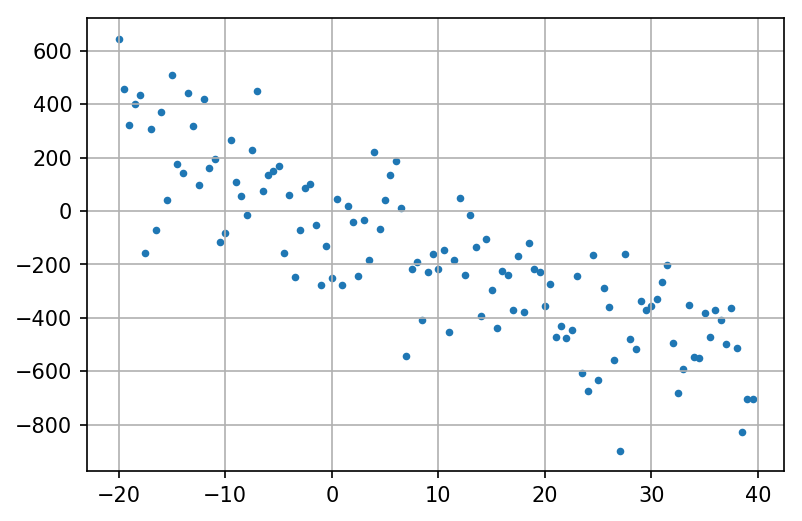

In [6]:
plt.scatter(x, y, s=7)
plt.grid(True)
plt.show()

In [7]:
slope, intercept, sr, r2 = linregress(x, y)
print("Slope: %.3f" %slope)
print("y-intercept: %.3f" %intercept)
print("sr: %.3f" %sr)
print("r2: %.3f" %r2)

Slope: -15.075
y-intercept: -15.075
sr: 3516551.164
r2: 0.699


$Slope = -15.075$  
$y-intercept = -12.009$  
$S_r = 3,516,551.164$  
$r^2 = 0.69$  

In [8]:
linear = linear_regression(x, y)

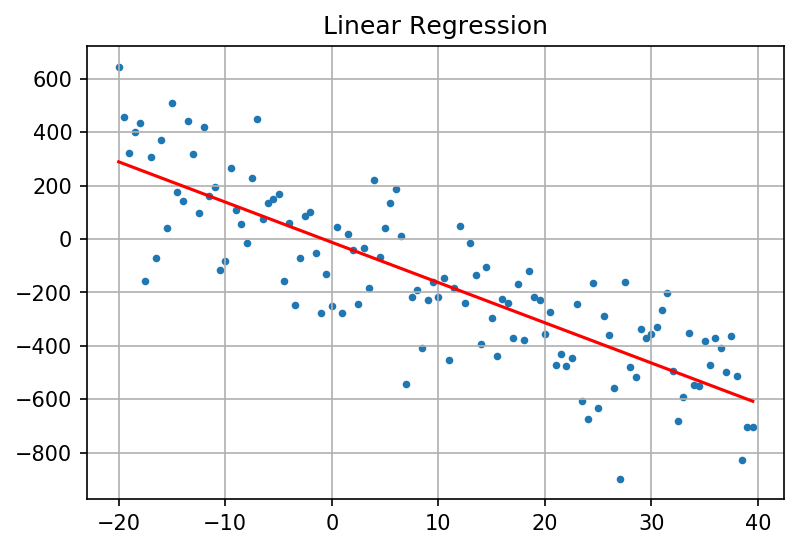

In [9]:
plt.scatter(x, y, s=7)
plt.plot(x, linear, color='r')
plt.title('Linear Regression')
plt.grid(True)
plt.show()

## Non-Linear Least squares
 * Linear regression is predicated on the fact that the relationship between the dependent and independent variables is linear - this is not always the case.
 * Three common examples are:

 
1. exponential


$y = \alpha_1 e^{\beta_1 x}$


2. power


$y = \alpha_2 x^{\beta_2}$


3. saturation growth rate


$y = \alpha_3 \frac{x}{\beta_3 + x}$

### Linearization of Nonlinear Relationships
* One option for finding the coefficients for a nonlinear fit is to linearize it. For the three common models, this may involve taking logarithms or inversion:

#### Nonlinear
1. exponential


$y = \alpha_1 e^{\beta_1 x}$  


2. power


$y = \alpha_2 x^{\beta_2}$


3. saturation growth rate


$y = \alpha_3 \frac{x}{\beta_3 + x}$

#### Linearized
1. exponential


$\ln y = \ln \alpha_1+\beta_1 x$  


2. power


$\log y = \log \alpha_2+\beta_2 \log x$


3. saturation growth rate


$\frac{1}{y} = \frac{1}{\alpha_3}+\frac{\beta_3}{\alpha_3}\frac{1}{x}$

In [10]:
def expo_linearlized(x, y):
    z = np.log(y)
    w = x
    return w, z

def power_linearlized(x, y):
    z = np.log10(y)
    w = np.log10(x)
    return w, z

def saturation_linearlized(x, y):
    z = 1 / y
    w = 1 / x
    return w, z

def find_slope(w, z):
    wz = w * z
    w2 = w ** 2
    return (wz.mean() - (w.mean() * z.mean())) / (w2.mean() - (w.mean() ** 2))

def find_intercept(w, z):
    slope = find_slope(w, z)
    return z.mean() - (slope * w.mean())

def find_sr_expo(w, z):
    alpha = math.e ** find_intercept(w, z)
    beta = find_slope(w, z)
    sum_error = 0
    for i in range(w.size):
        sum_error += math.pow(z[i] - (alpha * (math.e ** (beta * w[i]))), 2)
    return sum_error

def find_sr_power(w, z):
    alpha = 10 ** find_intercept(w, z)
    beta = find_slope(w, z)
    sum_error = 0
    for i in range(w.size):
        sum_error += math.pow(z[i] - (alpha * (w[i] ** beta )), 2)
    return sum_error

def find_sr_saturation(w, z):
    alpha = 1 / find_intercept(w, z)
    beta = find_slope(w, z) * alpha
    sum_error = 0
    for i in range(w.size):
        sum_error += math.pow(z[i] - (alpha * (w[i] / (beta + w[i]))), 2)
    return sum_error

def find_st(z):
    sum_st = 0
    for i in range(z.size):
        sum_st += math.pow((z[i] - z.mean()), 2)
    return sum_st

def find_r2_expo(w, z):
    st = find_st(z)
    sr = find_sr_expo(w, z)
    return (st - sr) / st

def find_r2_power(w, z):
    st = find_st(z)
    sr = find_sr_power(w, z)
    return (st - sr) / st

def find_r2_saturation(w, z):
    st = find_st(z)
    sr = find_sr_saturation(w, z)
    return (st - sr) / st

def expo_regress(w, z):
    alpha = math.e ** find_intercept(w, z)
    beta = find_slope(w, z)
    sr = find_sr_expo(w, z)
    r2 = find_r2(w, z)
    return alpha, beta, sr, r2

def power_regress(w, z):
    alpha = 10 ** find_intercept(w, z)
    beta = find_slope(w, z)
    sr = find_sr_power(w, z)
    r2 = find_r2(w, z)
    return alpha, beta, sr, r2

def saturation_regress(w, z):
    alpha = 1 / find_intercept(w, z)
    beta = find_slope(w, z) * alpha
    sr = find_sr_saturation(w, z)
    r2 = find_r2(w, z)
    return alpha, beta, sr, r2

In [11]:
def expo_regression(x, y):
    reg = []
    z = np.log(y)
    w = x
    alpha = math.e ** find_intercept(w, z)
    beta = find_slope(w, z)
    for i in range(x.size):
        reg.append(alpha * (math.e ** (beta * x[i])))
    return reg

def power_regression(x, y):
    reg = []
    z = np.log10(y)
    w = np.log10(x)
    alpha = 10 ** find_intercept(w, z)
    beta = find_slope(w, z)
    for i in range(x.size):
        reg.append(alpha * (x[i] ** beta ))
    return reg

def saturation_growth_regression(x, y):
    reg = []
    z = 1 / y
    w = 1 / x
    alpha = 1 / find_intercept(w, z)
    beta = find_slope(w, z) * alpha
    for i in range(x.size):
        reg.append(alpha * (x[i] / (beta + x[i])))
    return reg

### Example Data

In [12]:
x, y = np.loadtxt("data/test_stat2_37.csv")
y = y + 200

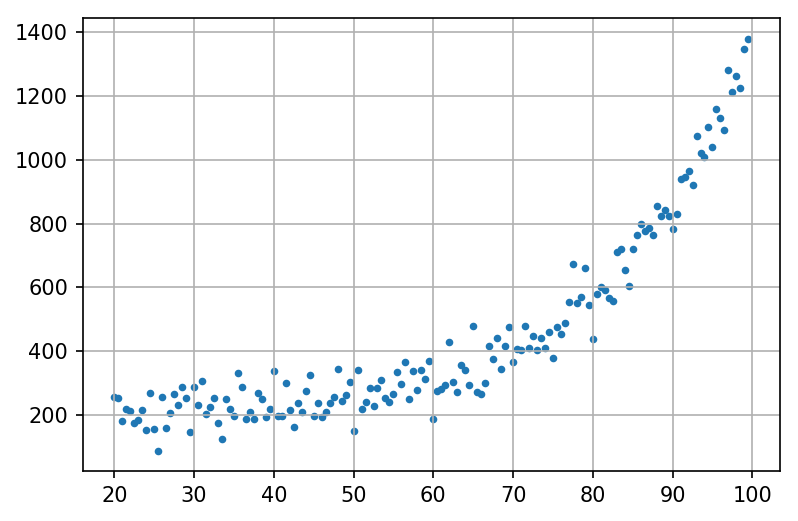

In [13]:
plt.scatter(x, y, s=7)
plt.grid(True)
plt.show()

In [14]:
w, z = expo_linearlized(x, y)
alpha, beta, sr, r2 = expo_regress(w, z)
print("alpha: %.3f" % alpha)
print("beta: %.3f" % beta)
print("sr: %.3f" % sr)
print("r2: %.3f" % r2)

alpha: 91.544
beta: 0.023
sr: 36235356.288
r2: 0.824


In [15]:
expo = expo_regression(x, y)

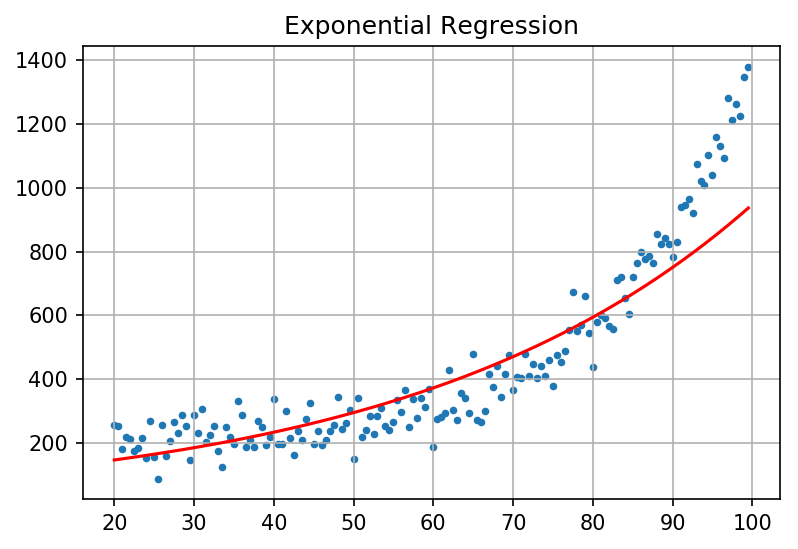

In [16]:
plt.scatter(x, y, s=7)
plt.plot(x, expo, color='r')
plt.title('Exponential Regression')
plt.grid(True)
plt.show()

In [17]:
x, y = np.loadtxt("data/test_stat2_40.csv")
y = y * (-1)

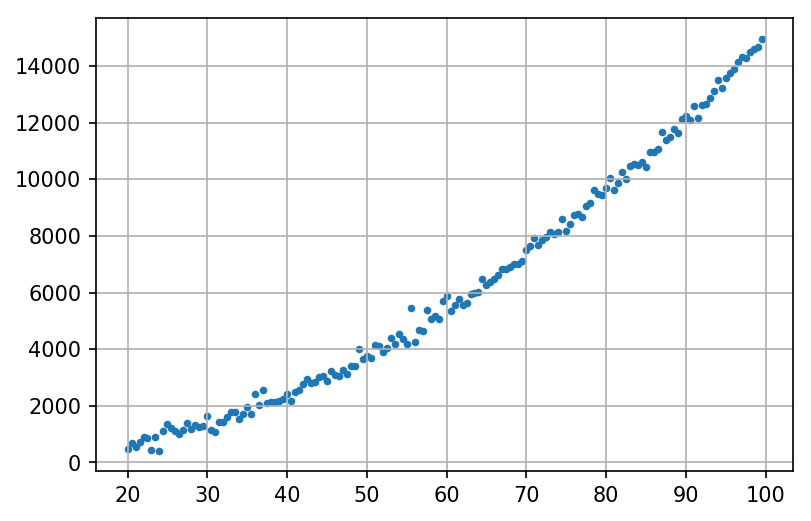

In [18]:
plt.scatter(x, y, s=7)
plt.grid(True)
plt.show()

In [19]:
w, z = power_linearlized(x, y)
alpha, beta, sr, r2 = power_regress(w, z)
print("alpha: %.3f" % alpha)
print("beta: %.3f" % beta)
print("sr: %.3f" % sr)
print("r2: %.3f" % r2)

alpha: 1.447
beta: 2.009
sr: 151.243
r2: 0.986


In [20]:
power = power_regression(x, y)

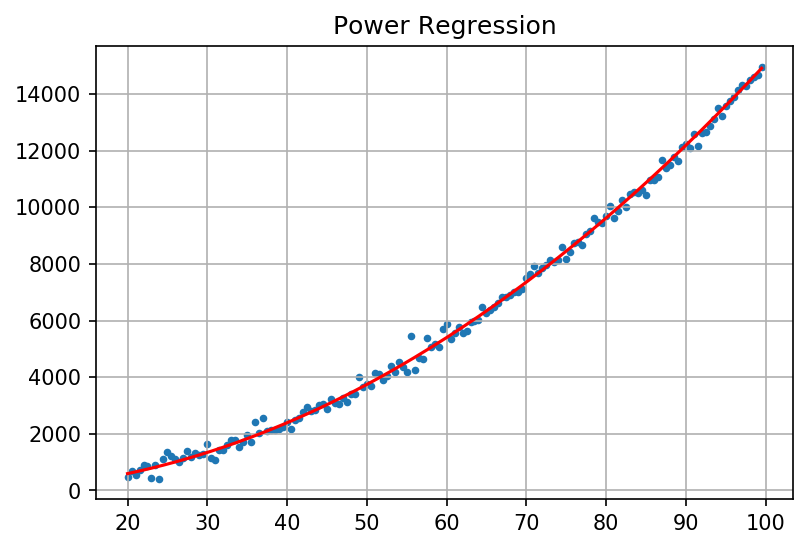

In [21]:
plt.scatter(x, y, s=7)
plt.plot(x, power, color='r')
plt.title('Power Regression')
plt.grid(True)
plt.show()

In [22]:
x, y = np.loadtxt("data/test_stat2_6.csv")

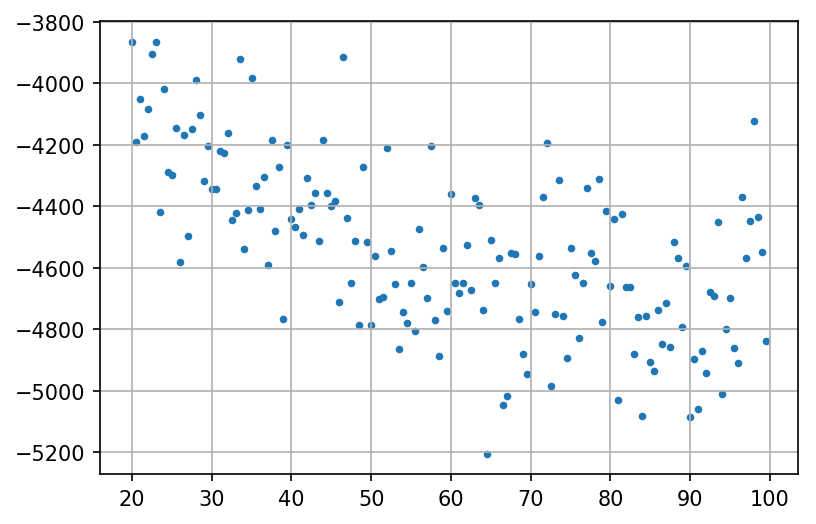

In [23]:
plt.scatter(x, y, s=7)
plt.grid(True)
plt.show()

In [24]:
w, z = saturation_linearlized(x, y)
alpha, beta, sr, r2 = saturation_regress(w, z)
print("alpha: %.3f" % alpha)
print("beta: %.3f" % beta)
print("sr: %.3f" % sr)
print("r2: %.3f" % r2)

alpha: -4962.778
beta: 4.849
sr: 84009.027
r2: 0.474


In [25]:
saturation = saturation_growth_regression(x, y)

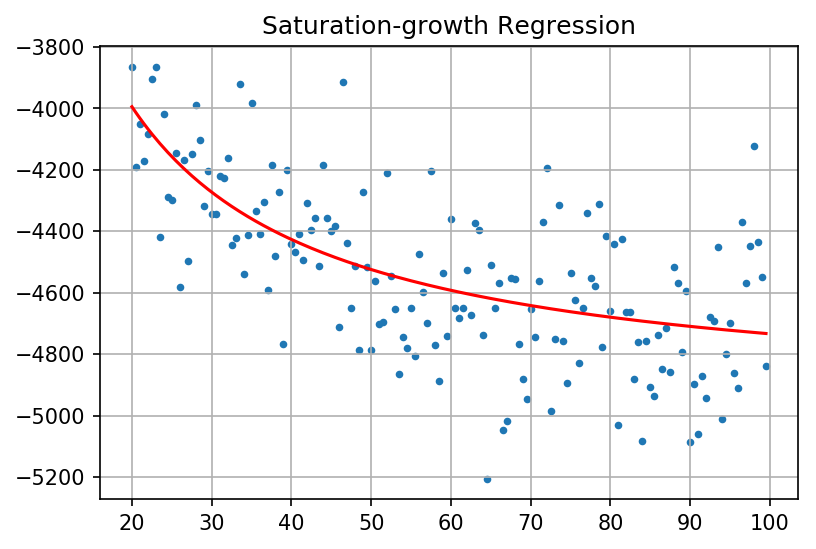

In [26]:
plt.scatter(x, y, s=7)
plt.plot(x, saturation, color='r')
plt.title('Saturation-growth Regression')
plt.grid(True)
plt.show()

## Least Squares and the normal equations

$$
A^TA\bar{X} = A^Tb
$$
for the least squares solution $\bar{x}$ that minimizes the Euclidean length if the residual $r = b -Ax$

Example
Solve the least squares problem

$$
\begin{bmatrix}
1 & -4 \\ 
2 & 3  \\ 
2 & 2
\end{bmatrix}
\begin{bmatrix}
x_1 \\ 
x_2
\end{bmatrix}
=
\begin{bmatrix}
-3 \\ 
15 \\
9
\end{bmatrix}
$$

In [30]:
A = np.array([1, -4, 2, 3, 2, 2]).reshape(3, 2)
b = np.array([-3, 15, 9])
x = linalg.lstsq(A, b)
print(x[0])

[3.8 1.8]


### Example
Find the line that best fits the three data points (t,y)=(1,2),(-1,1) and (1,3) 
The model is $y = c_1 + c_2t$

In [28]:
A = np.array([1, 1, 1, -1, 1, 1]).reshape(3, 2)
b = np.array([2, 1, 3])
x = linalg.lstsq(A, b)
print(x[0])

[1.75 0.75]


The best line is $y = \frac{7}{4} + \frac{3}{4}t$